# Pipeline for Hydra Muscle Modeling

In [16]:
%load_ext autoreload
%autoreload 2

import sys, os, multiprocessing
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

#import pandas as pd
import ray.dataframe as pd

from hydramuscle.model.smc import SMC
from hydramuscle.model.shell import Shell
from hydramuscle.postprocessing.force_encoder_2d import ForceEncoder2D

from hydramuscle.postprocessing.visualizer.save_video_parallel import *
from hydramuscle.postprocessing.visualizer.vlib import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
TOTAL_TIME = 100
TIME_STEP = 0.0002
PARAM_K2 = 0.1
PARAM_S0 = 400
PARAM_D = 40e-4
PARAM_V7 = 0.01
BEHAVIOR = 'contraction burst'
NUMX = 200
NUMY = 200
SAVE_INTERVAL = 50
STIMS_FAST = [1,3,5,7,9,12,15,18,22,26,31,36,42]
STIMS_SLOW = []

PROJECT = "c_200x200_100s_ele_random_500_conductance"
NUMX = 200
NUMY = 200
TARGETFPS = 400

## Run the model and save calcium data

In [ ]:
# model = Shell(SMC(T=TOTAL_TIME, 
#                   dt=TIME_STEP, 
#                   k2=PARAM_K2, 
#                   s0=PARAM_S0, 
#                   d=PARAM_D, 
#                   v7=PARAM_V7), 
#               behavior=BEHAVIOR, 
#               numx=NUMX, 
#               numy=NUMY)
# sol = model.run(STIMS_FAST, STIMS_SLOW)
# c = sol[:,0:model.numx*model.numy]
# df = pd.DataFrame(c)
# df.to_csv('/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/'+PROJECT+'.csv', 
#           index = False)

## Or... Read data from the .csv file

In [58]:
SOURCE = "/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/"+PROJECT+".csv"
c = pd.read_csv(SOURCE).values

In [59]:
c.shape

(10001, 40000)

## Save the calcium data as frames and video

In [ ]:
if not os.path.exists('/media/hengji/DATA/Data/Documents/hydramuscle/results/animations/'+PROJECT+'/frames/'):
    os.makedirs('/media/hengji/DATA/Data/Documents/hydramuscle/results/animations/'+PROJECT+'/frames/')
    os.makedirs('/media/hengji/DATA/Data/Documents/hydramuscle/results/animations/'+PROJECT+'/movie/')

save_frames(c, PROJECT, NUMX, NUMY)
save_video(PROJECT, TARGETFPS)

The number of CPU is:12
saving frames...
saving img0...
saving img1...
saving img2...
saving img5...
saving img3...
saving img9...
saving img8...
saving img6...
saving img4...
saving img7...
saved 1
saved 0
saved 3
saved 2
saved 9
saved 5
saved 4
saved 6
saved 8
saved 7
saving img12...
saving img10...
saved 12
saving img19...
saving img11...
saving img14...
saving img13...
saving img17...
saving img15...
saving img16...
saving img18...
saved 10
saved 14
saved 13
saved 11
saved 17
saved 18
saved 19
saved 15
saved 16
saving img27...
saving img26...
saving img20...
saving img21...
saved 27
saving img22...
saving img23...
saving img25...
saving img24...
saving img28...
saving img29...
saved 26
saved 24
saved 20
saved 23
saved 21
saved 29
saved 25
saved 22
saved 28
saving img32...
saving img37...
saving img30...
saving img31...
saving img36...
saved 32
saving img34...
saving img35...
saving img33...
saving img39...
saving img38...
saved 30
saved 37
saved 36
saved 39
saved 31
saved 35
saved 

## Visualize specified frames

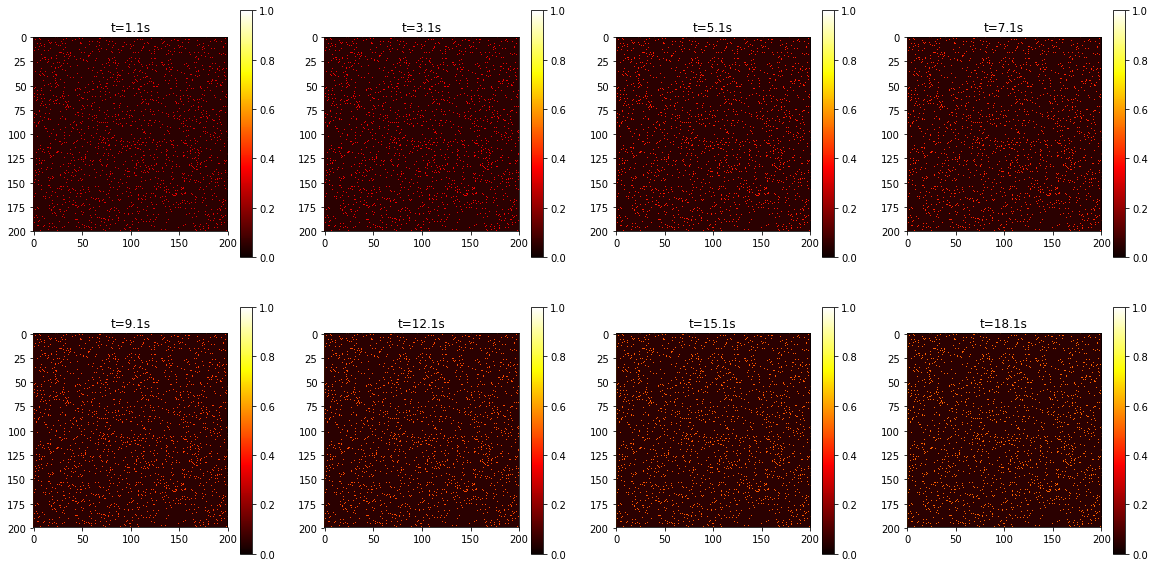

In [27]:
TIME_LIST = [t+0.1 for t in STIMS_FAST[:8]]
plot_frames(c, NUMX, NUMY, TIME_LIST, TIME_STEP*SAVE_INTERVAL, 0, 1)

## Visualize the calcium trace of the specified points

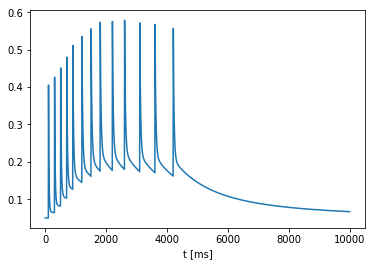

In [50]:
I_X = 0
I_Y = 0

index = I_X*NUMX + I_Y
save_curve(x=c[:,index],
           filename=None,
           show=True, 
           save=False)

## Visualize the average calcium trace over time

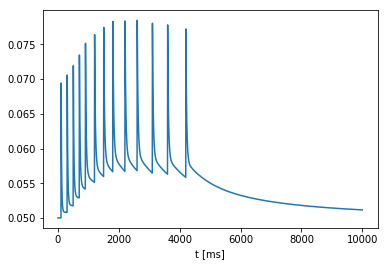

In [55]:
save_curve(x=np.mean(c, axis=1),
           filename=None,
           show=True, 
           save=False)